Welcome to the challenge organised as part of **Voyage à Machine Learning** series by ***Nucleus-The Analytics Society of Shaheed Sukhdev College of Business Studies***. This challenge comprises a binary classification problem in which a dataset is provided and you need to give answers to the blanks that follows.

#### Participants must adhere to the following rules:
###### 1. Participants are required to mail their submission to nucleus@sscbs.du.ac.in latest by **10 PM, 24th June 2020 (Wednesday)**
##### 2. Submissions **post-deadline** will not be considered
##### 3. Participants can use **any programming language** and the codes provided in the Colab Notebook are just for the reference of beginners in Machine Learning 
##### 4. Use of **external dataset** or labels from open source will lead to **disqualification**

For this challenge, you will be using the Churn Modelling dataset. A Bank is witnessing some unsual churn rates and thus they want you to predict whether a particular customer will leave the bank or not, based on the data provided. 

First, start by importing all necessary libraries and classes required to solve the problem set. Various machine learning models to be applied for this challenge includes:

1) Logistic Regression
2) Random Forest
3) K-Nearest Neighbors
4) Support Vector Machines

The basic objective is to find out which model does the most suitable job of predicting outcome and with how much accuracy.

So, go ahead and start by importing all the libraries that you will need.

In [1]:
"""
Import necessary libralies and model classes
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

**Get your dataset from: [ML Dataset](https://drive.google.com/file/d/1GzTseW9OY7riN34uZaKgh2xPv1mJ0EsX/view?usp=sharing)**

Add Dataset to colab, and get started!

In [2]:
"""
Setting the figure dimensions
"""
%matplotlib inline
rcParams['figure.figsize'] = 10, 6

In [3]:
"""
Importing seaborn library and setting the figure sytle
"""
import seaborn as sb
sb.set_style('darkgrid')

In [4]:
"""
Importing the dataset 
"""
df = pd.read_csv("Churn_Modelling.csv")


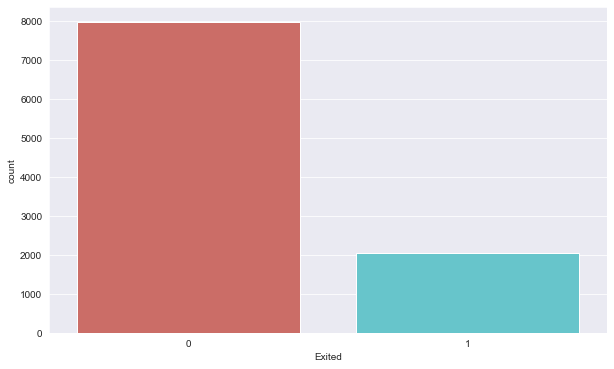

In [5]:
"""
Checking that my target variable is binary
"""
sb.countplot(x = 'Exited', data = df, palette='hls')
plt.show()

In [6]:
"""
Checking for missing
"""
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As observed above, there are no missing values in all of the features

In [7]:
"""
Getting the description of the dataset
"""
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
"""
Checking the information regarding the dataset to see whether variables
have equal size
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


In [9]:
"""
Getting unique count for each variable
"""
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
"""
Dropping the irrelevant columns
"""
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

The main reason for dropping the above features is because;
* The rownumber attribute acts like a counter of records
* The customerid attribute acts as a unique identifier for a customer 
* the surname attribute as an entrie for the customer. 
* Therefore, they don't have any useful impact on the analysis 
 and thus dropping them from the dataset doesn't have any negative impact on the model

In [11]:
"""
Checking the data types for each variable
"""
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
"""
Checking for the percentage per category for the target column
"""
labels_perc = df.Exited.value_counts(normalize = True) * 100
labels_perc

0    79.63
1    20.37
Name: Exited, dtype: float64

The above results show that target label 0 has many records compared to the target label 1. For the label 0, there are about 79.63% whereas for the label 1, there are about 20.37%

In [13]:
""" 
Getting the correlation matrix of the target and other features
"""
df[df.columns].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


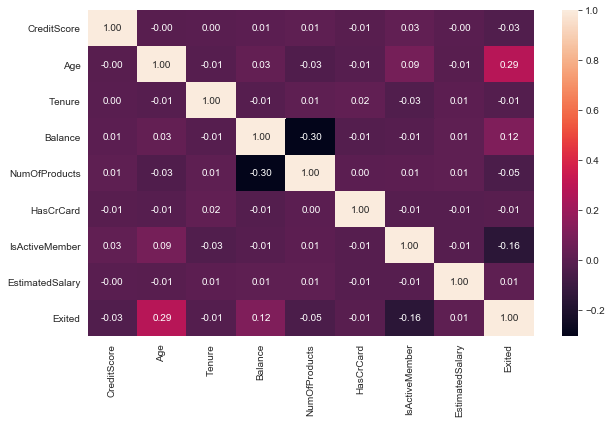

In [14]:
"""
Checking for independence between features using a heat map
"""
sb.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

From the graph above,
* it the diagonal values are highly correlated since they are correlated with other
* balance feature is negatively correlated with NumOfProducts which means that as one is increasing,the other is decreasing.

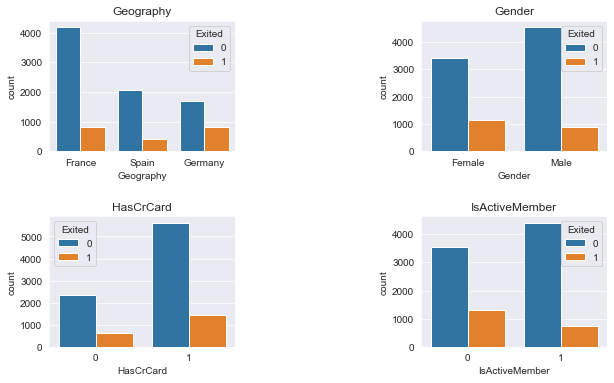

In [15]:
"""
Ploting the count plot for categorical to analyse how they are performing between 
churn and non churn customers
"""

Categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

fig = plt.figure()
for i, cat_features in enumerate(Categorical_features):
    plt.subplot(2, 2, i+1)
    sb.countplot(x=cat_features, hue = 'Exited',data = df)
    fig.subplots_adjust(hspace=0.5, wspace=1)
    plt.title(f'{cat_features}')

From the above plots;
* Germany has the highest proportion of churned customers, followed by France and then Spain
* France has the highest proportion of non churning customers, followed by Spain and then Germany
* Also, it is observed that females churn more than male
* Astonishingly, customers with credit cards have the highest churning rate
* Lastly, inactive customers churn more compared to active customers

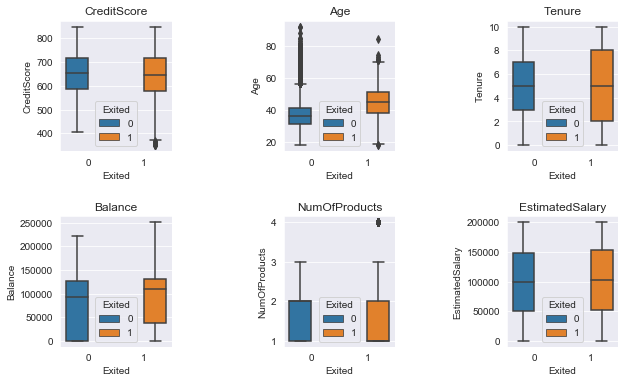

In [16]:
"""
Ploting the count plot for numerical to analyse how they are performing between 
churn and non churn customers
"""

Numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig = plt.figure()
for i, num_features in enumerate(Numerical_features):
    plt.subplot(2, 3, i+1)
    sb.boxplot(y=num_features,x = 'Exited', hue = 'Exited',data = df)
    fig.subplots_adjust(hspace=0.5, wspace=1)
    plt.title(f'{num_features}')

From the above plots;
* Looking at the credit score, non churned and churned customers have a small/no difference
* Looking at the age, old customers have a high level of churning rate compared to the young customers
* Looking at the tenure, customers who have spent more time with the bank are more likely to churn compared to those who have spent an average time with it.
* Looking at the balance, customers with higher balance are likely to leave which is not good for the bank
* Looking at number of products, number of products don't have much impact on the rate of churn
* And also, estimated salary has no any impact on the churn rate.

In [17]:
"""
Converting categorical variables to a dummy indicators
for Gender
"""
label_encoder = LabelEncoder()
gender_cat = df['Gender']
gender_encoded = label_encoder.fit_transform(gender_cat)

In [18]:
"""
first 7 values
"""
gender_encoded[0:7]

array([0, 0, 0, 0, 0, 1, 1])

In [19]:
"""
1 = male and 0 = female
"""
gender_DF = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_DF.head()

,male_gender
0,0
1,0
2,0
3,0
4,0


In [20]:
"""
For Geograph using one hot encoder
"""
geography_cat = df['Geography']
geography_encoded = label_encoder.fit_transform(geography_cat)

In [21]:
"""
Printing the first 100 values
"""
geography_encoded[0:100]

array([0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0])

In [22]:
binary_encoder = OneHotEncoder(categories='auto')
geography_1hot = binary_encoder.fit_transform(geography_encoded.reshape(-1, 1))
geography_1hot_mat = geography_1hot.toarray()
geography_DF = pd.DataFrame(geography_1hot_mat, columns=['France', 'Spain', 'Germany'])
geography_DF.head()

,France,Spain,Germany
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


The above code, initializes the onehot encoder function, changes the shape of the encoder, makes an array and changes to a dataframe

In [23]:
"""
Printing the first 5 rows
"""
geography_DF.head()

,France,Spain,Germany
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [24]:
"""
Dropping the original Gender and Geography attributes
"""
df = df.drop(['Gender', 'Geography'], axis=1)

In [25]:
"""
Concatinating the dummy variables to the original dataset
"""
df_dummy = pd.concat([df, gender_DF, geography_DF], axis=1, verify_integrity=True)

In [26]:
"""
Printing the first 5 rows
"""
df_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,male_gender,France,Spain,Germany
0,619,42,2,0.00,1,1,1,101348.88,1,0,1.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0.0,0.0,1.0


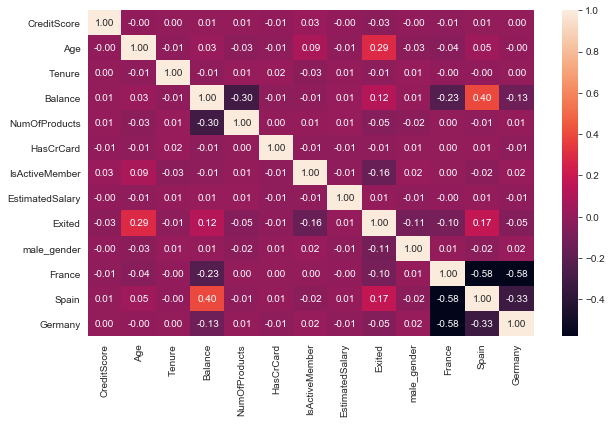

In [27]:
"""
Checking for the independence between features with dummy values using a heat map
"""
sb.heatmap(df_dummy.corr(), annot = True, fmt = ".2f")
plt.show()

### Feature Engineering

I would to explore and get more variables I think they can have more impact on the model; below are the variable I came up with;

1. The variable I came up with is the ratio that puts into account the balance and the estimated salary. This helps see whether customers with high balance ratio will churn or viceversa

In [28]:
df_dummy['Balance_Estimate_Salary_Ratio'] = df_dummy['Balance']/(df_dummy['EstimatedSalary'])

In [29]:
"""
Normalizing the Credit score, Age, Balance, EstimatedSalary, Balance_Estimated_Salary_Ratio

"""
df_dummy.CreditScore = (df_dummy.CreditScore - df_dummy.CreditScore.min())/(df_dummy.CreditScore.max() - df_dummy.CreditScore.min())

df_dummy.Age = (df_dummy.Age - df_dummy.Age.min())/(df_dummy.Age.max() - df_dummy.Age.min())

df_dummy.Balance = (df_dummy.Balance - df_dummy.Balance.min())/(df_dummy.Balance.max() - df_dummy.Balance.min())

df_dummy.EstimatedSalary = (df_dummy.EstimatedSalary - df_dummy.EstimatedSalary.min())/(df_dummy.EstimatedSalary.max() - \
                                                                                     df_dummy.EstimatedSalary.min())

df_dummy.Balance_Estimate_Salary_Ratio = (df_dummy.Balance_Estimate_Salary_Ratio - df_dummy.Balance_Estimate_Salary_Ratio.min())/ \
(df_dummy.Balance_Estimate_Salary_Ratio.max() - df_dummy.Balance_Estimate_Salary_Ratio.min())

The main reason for normalizing is because, there could be some outliers and normalizing them could reduce the 
effect of outliers to the model and most models work well with small values

### Building Predictive Model

Because I need classification model, I will try using different models to choose one with highest performance. And also putting into consideration that my labels are not balanced, trying out different models is better. Below are the models I will use;
1. Logistic Regression
2. Random Forest
3. K-Nearest Neighbor
4. Decision Tree
5. AdaBoost
6. Gradient Boosting

In [30]:
"""
Separating the target column which contains answer for row from other attributes
"""
X = df_dummy.drop(['Exited'], axis=1)
y = df_dummy.Exited

In [31]:
"""
Splitting the dataset into training and testing set 
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 25)

In [32]:
"""
Printing the shapes of X_train and y_train datasets
"""
print(X_train.shape)
print(y_train.shape)

(7000, 13)
(7000,)


As shown above, the training data is splitted. 30% of the training data will be used to check the training accuracy of the model and the remaining 70% will be used for the actual training purposes.

### Logistic Regression

In [33]:
"""
Initializing Logistic Regression model
"""
LogReg = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=1000,multi_class='auto',n_jobs=None, 
                            penalty='l2', random_state=None, solver='lbfgs', tol=1e-05, verbose=0, 
                            warm_start=False)
"""
Fitting the model with the training data
"""
LogReg.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [34]:
"""
Predicting the response for the dataset
"""
yLog_pred = LogReg.predict(X_test)

In [35]:
"""
Model Evaluation 
"""

print(classification_report(y_test, yLog_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2419
           1       0.59      0.23      0.33       581

    accuracy                           0.82      3000
   macro avg       0.71      0.59      0.61      3000
weighted avg       0.79      0.82      0.79      3000



In [36]:
"""
K-fold cross-validation and confusion matrices
"""
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[5328,  216],
       [1147,  309]], dtype=int64)

In [37]:
"""
Computing the accuracy of the model
"""
LogReg.score(X_test, y_test)

0.8193333333333334

### KNN

In [38]:
"""
Initialization of the KNN model
"""
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                                    metric='minkowski', metric_params=None)
"""
Fitting the model with training data
"""
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
"""
Evaluate model predictions
"""
yKNN_pred = clf.predict(X_test)
y_expect = y_test

print(classification_report(y_expect, yKNN_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2419
           1       0.51      0.24      0.33       581

    accuracy                           0.81      3000
   macro avg       0.68      0.59      0.61      3000
weighted avg       0.78      0.81      0.78      3000



In [40]:
"""
Computing model accuracy
"""
clf.score(X_test, y_test)

0.809

### Random Forest

In [41]:
"""
Initialization of the model
"""
classifier = RandomForestClassifier(n_estimators = 200, random_state = 0)
y_train_array = np.ravel(y_train)

"""
Fitting the model with training data
"""
classifier.fit(X_train, y_train_array)


"""
Predicting the response for the dataset
"""
yRand_pred = classifier.predict(X_test)

In [42]:
"""
Evaluating model predictions
"""
print(classification_report(y_test, yRand_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2419
           1       0.77      0.47      0.58       581

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000



In [43]:
"""
Computing the model accuracy
"""
classifier.score(X_test, y_test)

0.8703333333333333

In [44]:
"""
Comparing the y_test and model predictions
"""
y_test_array = np.ravel(y_test)
print(y_test_array)

print(yRand_pred)

[1 0 0 ... 1 0 1]
[0 0 0 ... 1 0 1]


As it can be observed from above, the model is not predicting well on some values

### AdaBoost model

In [45]:
"""
Initialization of the AdaBoost model
"""
adaBoost = AdaBoostClassifier(base_estimator= None, n_estimators=200, learning_rate= 1.0)

"""
Fitting the model with the training data
"""
adaBoost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [46]:
"""
Predicting the response for the dataset
"""
yAda_pred = adaBoost.predict(X_test)

In [47]:
"""
Evaluating model predictions
"""
print(classification_report(y_test, yAda_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2419
           1       0.70      0.45      0.55       581

    accuracy                           0.86      3000
   macro avg       0.79      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



In [48]:
"""
Computing the model accuracy
"""
adaBoost.score(X_test, y_test)

0.8573333333333333

### Decision Tree

In [49]:
"""
Create Decision Tree classifier object
"""
treeClf = DecisionTreeClassifier(criterion='entropy', max_depth = 3)

"""
Train Decision Tree Classifier
"""
treeClf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
"""
Predicting the response for the dataset
"""
ytree_pred = treeClf.predict(X_test)

In [51]:
"""
Evaluating model predictions
"""
print(classification_report(y_test, ytree_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2419
           1       0.82      0.27      0.41       581

    accuracy                           0.85      3000
   macro avg       0.84      0.63      0.66      3000
weighted avg       0.84      0.85      0.82      3000



In [52]:
"""
Computing the model acuracy
"""
treeClf.score(X_test, y_test)

0.848

### Gradient Boost

In [53]:
"""
Initialization of Gradient Boosting model
"""
gdBoost = GradientBoostingClassifier(loss = 'deviance', n_estimators = 200)

"""
Fitting the model with the training data
"""
gdBoost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
"""
Predicting the response for the dataset
"""
gd_pred = gdBoost.predict(X_test)

In [55]:
"""
Evaluating model predictions
"""
print(classification_report(y_test, gd_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2419
           1       0.76      0.51      0.61       581

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.77      3000
weighted avg       0.87      0.87      0.86      3000



In [56]:
"""
Computing the accuracy of the model
"""
gdBoost.score(X_test, y_test)

0.8736666666666667

In [57]:
"""
Comparing y_test and gradient boost predicted values
"""
print(y_test_array)

print(gd_pred)

[1 0 0 ... 1 0 1]
[0 0 0 ... 1 0 1]


From the above results, it is observed that, the model is not performing well on some values. 
* However, I believe that by feeding with more and balanced data can make it perform highly better

### Conclusion

To evaluate the performance of my models, I put into consideration different metrics which include theses ones below;
* **Recall**: When the actual value is positive, how often is the prediction correct?
* **Precision** : When a positive value is predicted, how often is the prediction correct?
* **Accuracy** : The ratio of correctly predicted observation to the total observations
* The main reason for this is mainly because, my dataset has unbalanced labels **(True (1) and False (0))**.
* Therefore, putting into consideration those three metrics mentioned above, it is observed that, **Gradient Boosting model** performs better than others followed by **Random Forest** and then **AdaBoost model**.
* **Decision tree** and **Logistic models** didn't perform well

* In addition, from the analysis made, it was observed that; 
* Germany has the highest proportion of churned customers, followed by France and then Spain
* France has the highest proportion of non churning customers, followed by Spain and then Germany
* Also, it is observed that females churn more than males
* Astonishingly, customers with credit cards have the highest churning rate
* Lastly, inactive customers churn more compared to active customers

* More to that;
* Looking at the credit score, non churned and churned customers have a small/no difference
* Looking at the age, old customers have a high level of churning rate compared to the young customers
* Looking at the tenure, customers who have spent more time with the bank are more likely to churn compared to those who have spent an average time with it.
* Looking at the balance, customers with higher balance are likely to leave which is not good for the bank
* Looking at number of products, number of products don't have much impact on the rate of churn
* And also, estimated salary has no any impact on the churn rate.

* Updating the Gradient Boosting, Random Forest and AdaBoost models with more and balanced data would make them perform better